In [51]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import rice, poisson, rayleigh
from IPython.display import Image

In [52]:
old_image = '/Users/vusis/Documents/Code/Studia/Sem IV/Przetwarzanie Strumieni Danych/Monet.jpeg'
new_image = 'New_Monet.jpg'

image = cv2.imread(old_image)  

cv2.imwrite(old_image, image)

True

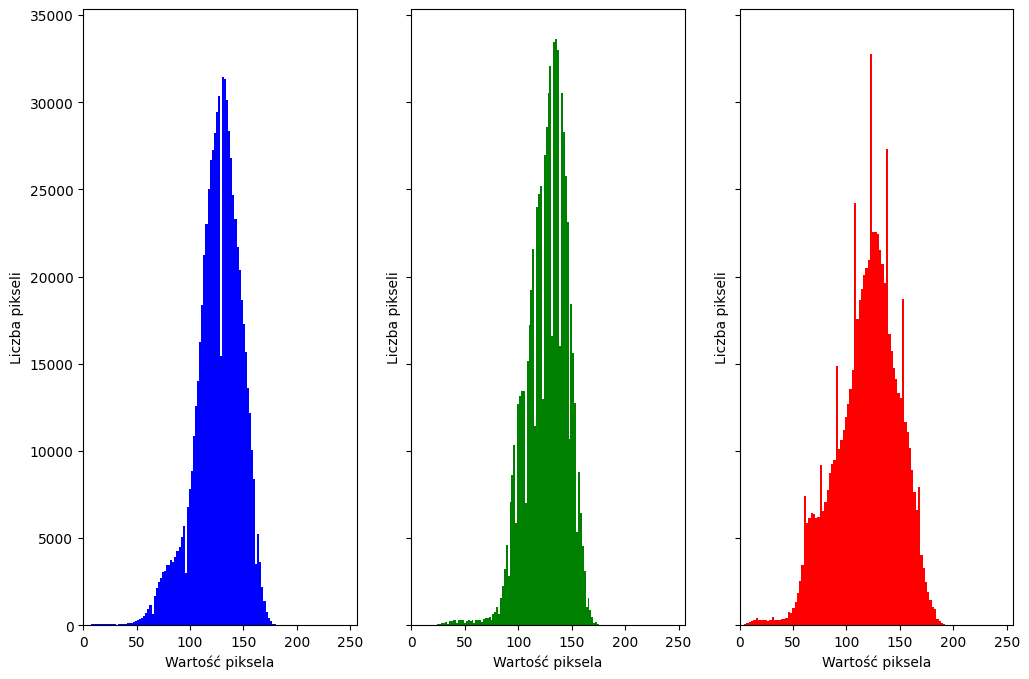

In [60]:
colors = ('b', 'g', 'r')

 
fig, axs = plt.subplots(1,3,figsize = (12,8), sharey=True)

for i, color in enumerate(colors):
    
    axs[i].hist(image[:,:,i].flatten(), bins = 100, color = color)
    axs[i].set_xlabel("Wartość piksela")
    axs[i].set_ylabel("Liczba pikseli") 
    axs[i].set_xlim([0, 256])   


plt.show()



In [54]:
image[:,:,0].flatten()

array([ 99,  97,  93, ..., 127, 131, 134], dtype=uint8)

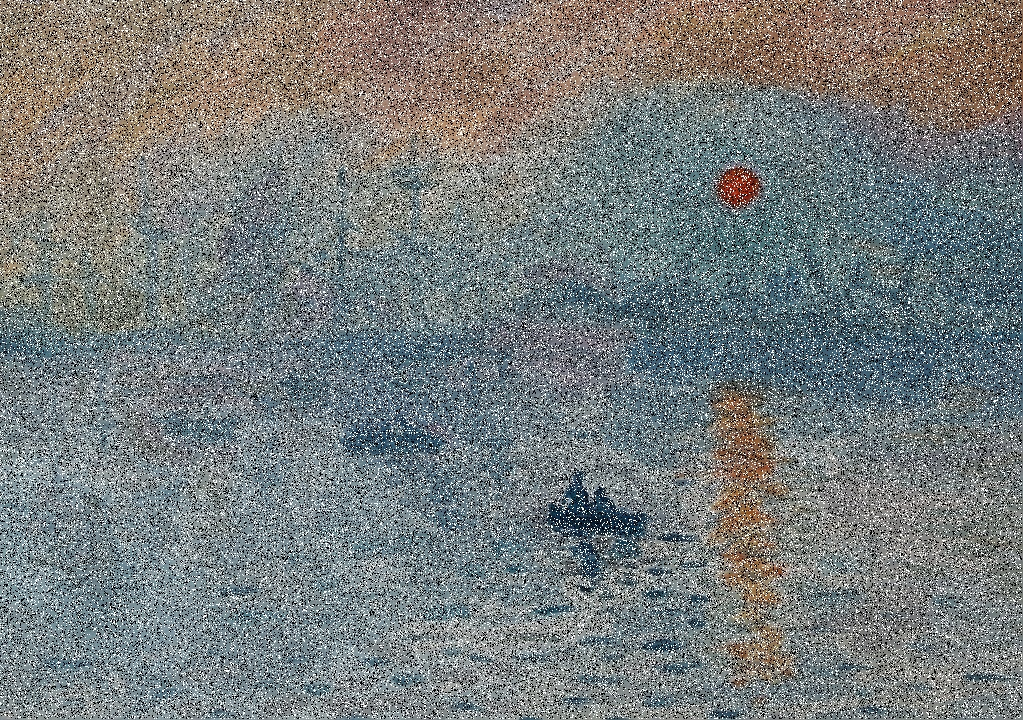

In [55]:
def salt_and_pepper_noise(image, amount=0.05):
    noisy_image = image.copy()
    

    num_salt = np.ceil(amount * image.size * 0.5)
    num_pepper = np.ceil(amount * image.size * 0.5)

    # Białe piksele
    coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape[:2]]
    noisy_image[coords[0], coords[1]] = 255

    # Czarne piksele
    coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape[:2]]
    noisy_image[coords[0], coords[1]] = 0

    return noisy_image

noisy = salt_and_pepper_noise(image,0.1)
cv2.imwrite(new_image, noisy)
Image(filename=new_image)


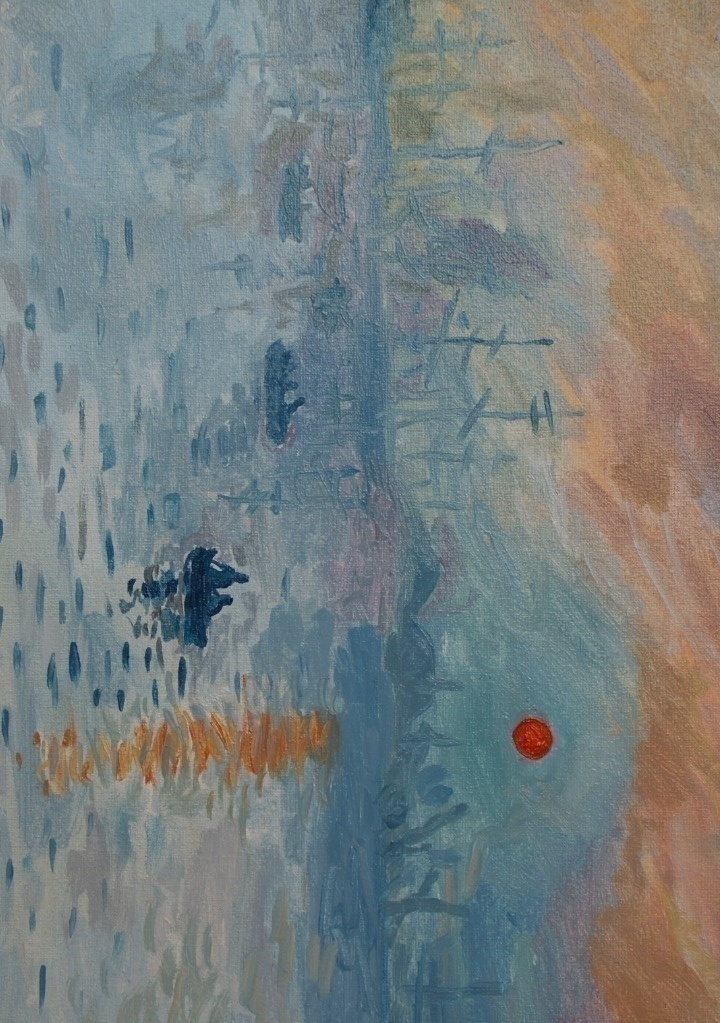

In [56]:
rotated = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)

cv2.imwrite(new_image, rotated)
Image(filename=new_image)


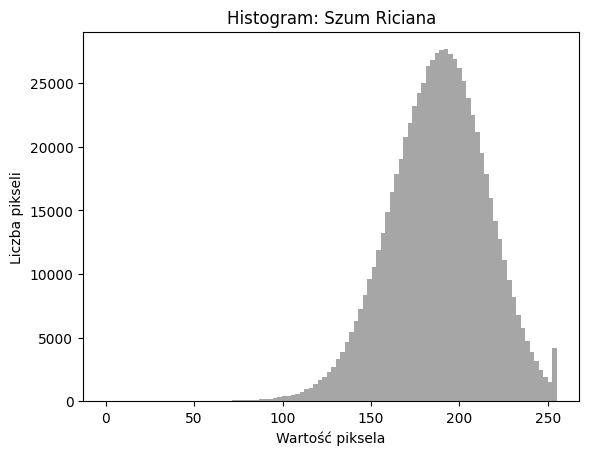

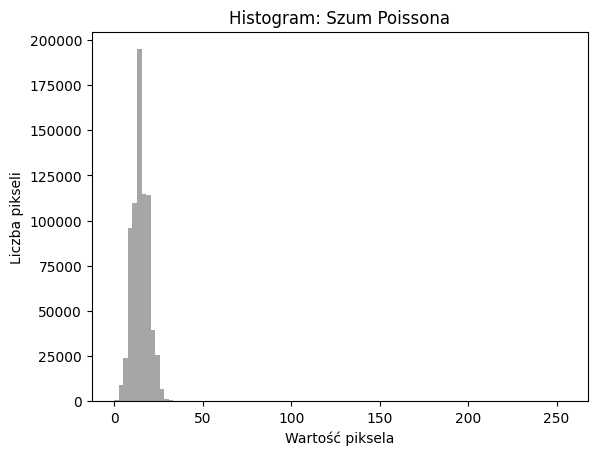

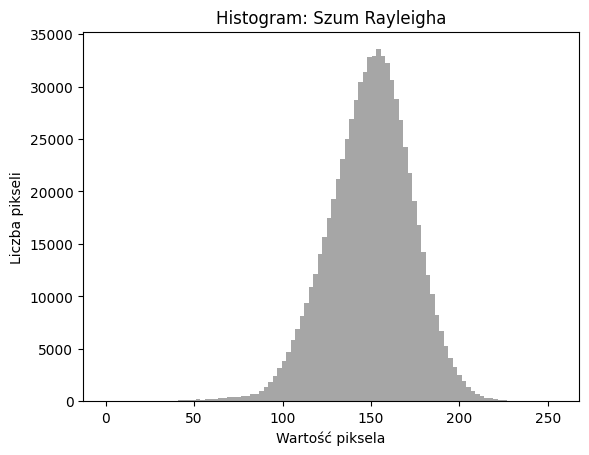

In [57]:

def plot_noise_hist(data, title):
    plt.figure()
    plt.hist(data.ravel(), bins=100, range=(0, 255), color='gray', alpha=0.7)
    plt.title(f"Histogram: {title}")
    plt.xlabel("Wartość piksela")
    plt.ylabel("Liczba pikseli")
    plt.show()

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = gray.astype(np.float32)

rician_noise = rice.rvs(3, scale=20, size=gray.shape)
rician_img = np.clip(gray + rician_noise, 0, 255)
plot_noise_hist(rician_img, "Szum Riciana")

poisson_noise = np.random.poisson(gray / 255.0 * 30)  
poisson_img = np.clip(poisson_noise, 0, 255)
plot_noise_hist(poisson_img, "Szum Poissona")

rayleigh_noise = rayleigh.rvs(scale=20, size=gray.shape)
rayleigh_img = np.clip(gray + rayleigh_noise, 0, 255)
plot_noise_hist(rayleigh_img, "Szum Rayleigha")


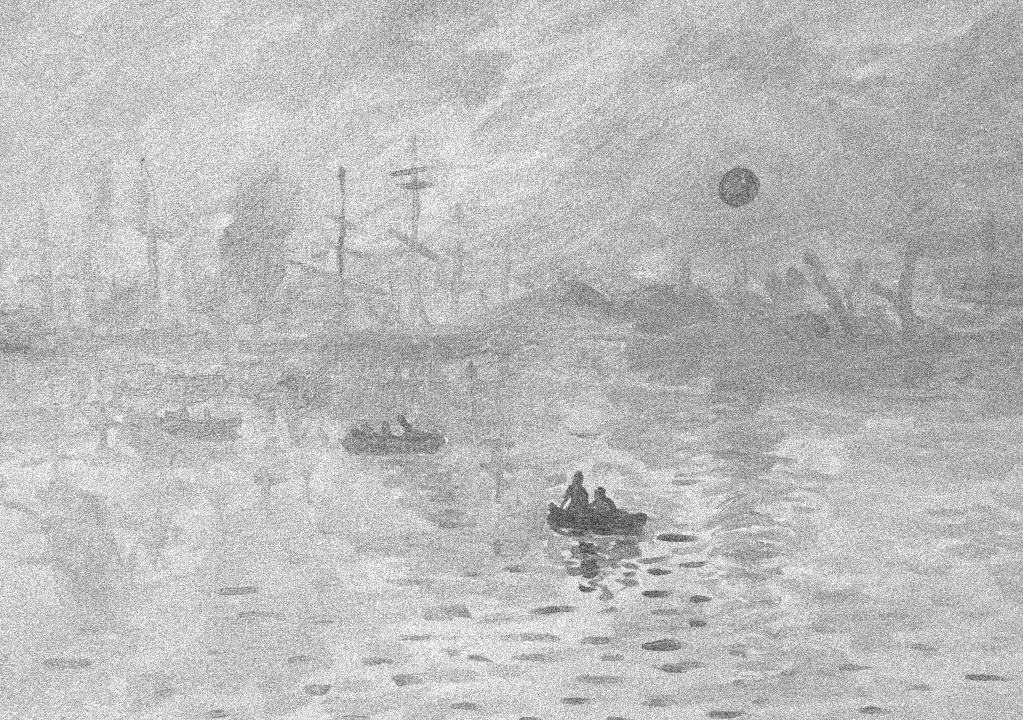

In [58]:
cv2.imwrite(new_image, rician_img)
Image(filename=new_image)

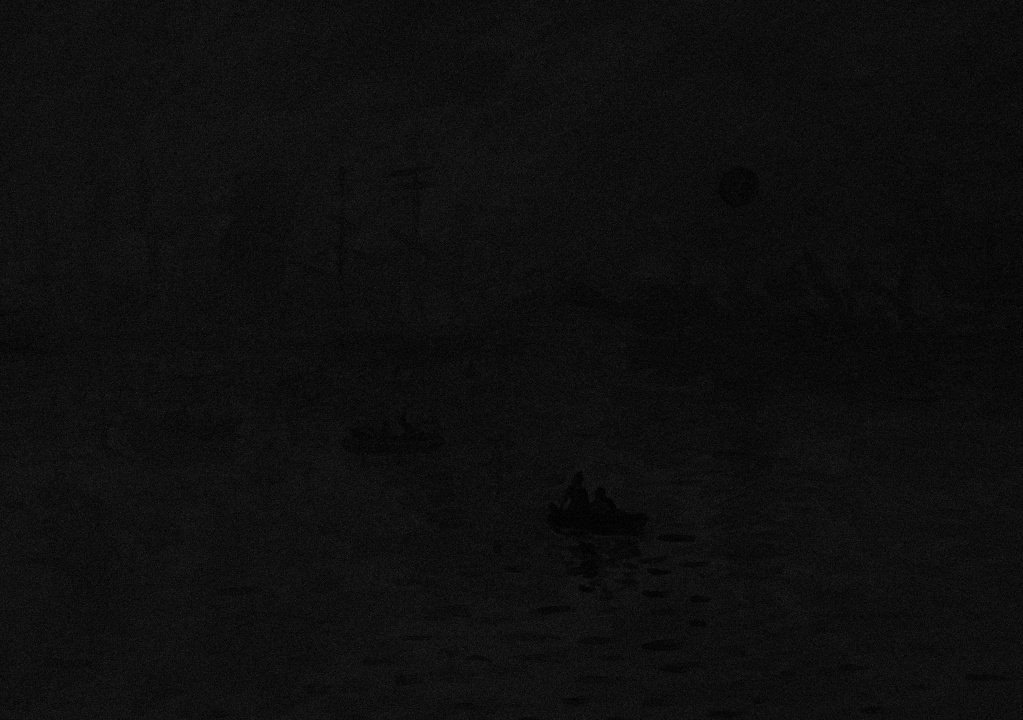

In [59]:
cv2.imwrite(new_image, poisson_img)
Image(filename=new_image)